Librerias

In [244]:
import pandas as pd
import os
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pydot
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Lectura y clasificacion de datos

In [245]:
directorio_actual = os.getcwd()

new_col_names=["ID",'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23',"Y"]

ruta_archivo = os.path.join(directorio_actual, "finales.xlsx")
datos = pd.read_excel(ruta_archivo)
datos.columns = new_col_names
datos.columns 

Parametros=datos[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]#Quitamos el ID para no limitar el modelo
Variable=datos['Y']


In [246]:
datos.head(6)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [247]:
Borra_Prueba = datos.iloc[[3]]
Borra_Prueba=Borra_Prueba[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]
Borra_Prueba.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000


## Descrip Df
- ID: identificador único para cada cliente.
- X1: monto del crédito otorgado (en dólares taiwaneses, incluye crédito individual y familiar).
- x2: género (1 = masculino; 2 = femenino)
- x3: educación (1 = postgrado; 2 = universitario; 3 = secundaria; 4 = otros).
- x4: estado civil (1 = casado; 2 = soltero; 3 = otros).
- x5: edad en años.
- x6-x11: historial de pagos pasados de abril(x11) a septiembre de 2005(x6);  
________donde -1 = pago puntual, 1 = retraso de un mes, hasta 9 = retraso de nueve meses o más.
- x12-x17: monto del extracto de la factura de abril(x17) a septiembre(x12) de 2005.
- x18-x23: monto pagado de abril(x23) a septiembre(x18) de 2005.
- y: variable de respuesta indicando si hubo un incumplimiento de pago;  
___donde si toma el valor de 0 es que no hubo incumplimiento y si es 1 quiere decir que si hubo incumplimiento.


In [248]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300

## Red de Perceptrón Multicapa (MLP)
##### Capas secuenciales para la de clasificacíon!
- Estructura: Una red de perceptrón multicapa es una red neuronal compuesta por capas densas (o totalmente conectadas). En estas capas, cada neurona está conectada a todas las neuronas de la capa anterior.
- Aplicaciones: Se utilizan generalmente para problemas de clasificación y regresión en los que las características son de tipo vectorial o secuencial.
- Limitaciones: No son especialmente adecuadas para trabajar con datos que tengan una estructura espacial, como imágenes (Por eso no usamos un modelos de red Convolucional [CNN]).

In [249]:


X_train_full, X_test, y_train_full, y_test = train_test_split(
    Parametros, Variable, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

#Normalizar los resultado
std_scl = StandardScaler()
std_scl.fit(X_train)

X_train = std_scl.transform(X_train)

X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

# Resumen
# Ajustamos el StandardScaler con los datos de entrenamiento (X_train) para calcular la media y desviación estándar de cada
# característica. Luego, se aplican las transformaciones de escalado a X_train, X_valid y X_test para normalizar todas las
# características a una media de 0 y una desviación estándar de 1. Esto es útil para mejorar el rendimiento de muchos modelos de
# aprendizaje automático, ya que normaliza las características y las pone en una escala COMPARABLE!!!.

In [250]:
X_train.dtype
#Verificacion de datos numericos

dtype('float64')

In [251]:
#Limpiamos un poco de memoria y modelos pasados; Modelo repetible "(42)"
tf.random.set_seed(42)
tf.keras.backend.clear_session()

#Numero de caracteristicas generadoras de Y
Num_PR=Parametros.shape[1]


model = tf.keras.Sequential()
#Capa de entrada (InputLayer)
model.add(tf.keras.layers.InputLayer(input_shape=(Num_PR,)))
#Capas Dense
model.add(tf.keras.layers.Dense(12, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)))# Funcion ReLU (Rectified Linear Unit) -> Max (0,x)
model.add(tf.keras.layers.Dense(4, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)))#Probar dejar/quitar segun el sobre ajuste
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))#Sigmoid para clasificacion binaria


# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Imprime un resumen del modelo
model.summary()




c:\Users\alejo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [252]:
model.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

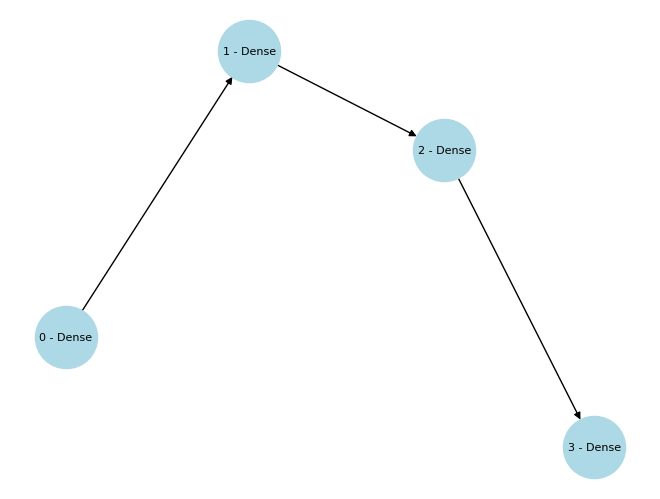

In [253]:
import tensorflow as tf
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
graph = nx.DiGraph()

# Añadir las capas al grafo
for i, layer in enumerate(model.layers):
    layer_name = f'{i} - {layer.__class__.__name__}'
    graph.add_node(layer_name)
    if i > 0:
        # Añadir una arista desde la capa anterior a la capa actual
        graph.add_edge(prev_layer_name, layer_name)
    prev_layer_name = layer_name

# Visualizar el grafo
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=8)
plt.show()


In [254]:
history = model.fit(X_train, y_train, epochs=3000,
                    validation_data=(X_valid, y_valid))

Epoch 1/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7755 - loss: 0.6629 - val_accuracy: 0.7760 - val_loss: 0.5205
Epoch 2/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7762 - loss: 0.4997 - val_accuracy: 0.8108 - val_loss: 0.4808
Epoch 3/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.4691 - val_accuracy: 0.8131 - val_loss: 0.4685
Epoch 4/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8197 - loss: 0.4588 - val_accuracy: 0.8129 - val_loss: 0.4625
Epoch 5/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8213 - loss: 0.4535 - val_accuracy: 0.8138 - val_loss: 0.4595
Epoch 6/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8220 - loss: 0.4505 - val_accuracy: 0.8146 - val_loss: 0.4577
Epoch 7/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8223 - loss: 0.4483 - val_accuracy: 0.8144 - val_loss: 0.4566
Epoch 8/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8225 - loss: 0.4470 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


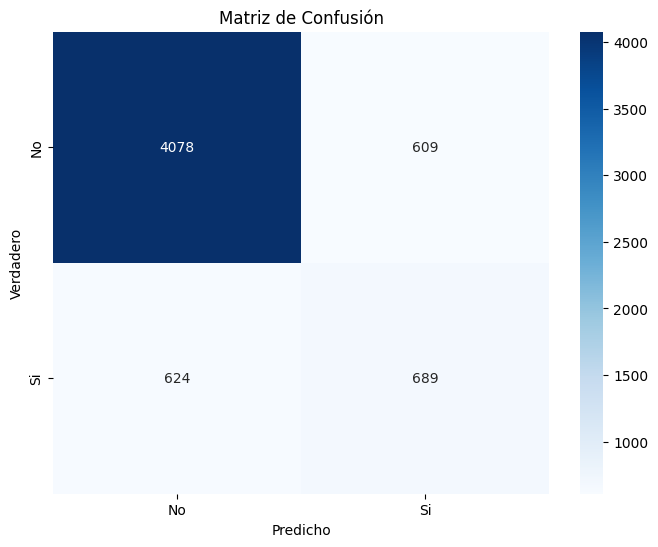

In [259]:

# Paso 1: Hacer predicciones en el conjunto de prueba
#Normalizar los resultado

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.35).astype(int)


# Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_test,y_pred)

# Paso 3: Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Si'], yticklabels=['No','Si'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


In [260]:
result=(cm[1][1]+cm[0][0])/(cm[0][0]+cm[0][1]+cm[1][1]+cm[1][0])
print(f'Accuracy - Exactitud: {round(result * 100,0)}%') 

result=(cm[0][1])/(cm[1][1]+cm[0][1])
print(f'Precisión positiva: {round(result * 100,2)}%') 

result=(cm[0][0])/(cm[0][0]+cm[1][0])
print(f'Precisión Negativa: {round(result * 100,2)}%') 

result=(cm[1][1])/(cm[1][0]+cm[1][1])
print(f'Verdaderos positivos (TPR-Recall): {round(result * 100,2)}%') 

result=(cm[0][0])/(cm[0][0]+cm[0][1])
print(f'Verdaderos negativos (TPR-Recall): {round(result * 100,2)}%') 

result=(cm[1][0])/(cm[1][0]+cm[1][1])
print(f'Positivos identificados como negativos (Error tipo 1 FPR): {round(result * 100,2)}%') 

result=(cm[0][1])/(cm[0][0]+cm[0][1])
print(f'Negativos identificados como positivos (Error tipo 1 FPR): {round(result * 100,2)}%') 


Accuracy - Exactitud: 79.0%
Precisión positiva: 46.92%
Precisión Negativa: 86.73%
Verdaderos positivos (TPR-Recall): 52.48%
Verdaderos negativos (TPR-Recall): 87.01%
Positivos identificados como negativos (Error tipo 1 FPR): 47.52%
Negativos identificados como positivos (Error tipo 1 FPR): 12.99%


In [261]:
# Evalúa el modelo en el conjunto de prueba
loss_test, accuracy_test = model.evaluate(X_test, y_test)

# Imprime el valor de la función de pérdida y la precisión en el conjunto de prueba
print(f"Función de pérdida en el conjunto de prueba: {loss_test}")
print(f"Precisión en el conjunto de prueba: {accuracy_test}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4449
Función de pérdida en el conjunto de prueba: 0.4388876259326935
Precisión en el conjunto de prueba: 0.8199999928474426


### Descomentar codigo para la prueba de usuario

In [279]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
             'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
             'X21', 'X22', 'X23']
# Names_Para=["Monto del crédito otorgado","Género","Educación","Estado civil","Edad",
#             "# Pagos en mora hasta septiembre (-1 si no tiene 9 para 9 meses o más)",
#             "# Pagos en mora hasta Agosto (-1 si no tiene 9 para 9 meses o más)",
#             "# Pagos en mora hasta Julio (-1 si no tiene 9 para 9 meses o más)",
#             "# Pagos en mora hasta Junio (-1 si no tiene 9 para 9 meses o más)",
#             "# Pagos en mora hasta Mayo (-1 si no tiene 9 para 9 meses o más)",
#             "# Pagos en mora hasta Abril (-1 si no tiene 9 para 9 meses o más)",
#             "# Monto del extracto de la factura en septiembre ",
#             "# Monto del extracto de la factura en Agosto ",
#             "# Monto del extracto de la factura en Julio ",
#             "# Monto del extracto de la factura en Junio ",
#             "# Monto del extracto de la factura en Mayo ",
#             "# Monto del extracto de la factura en Abril ",
#             "# Monto pagado en septiembre ",
#             "# Monto pagado en Agosto ",
#             "# Monto pagado en Julio ",
#             "# Monto pagado en Junio ",
#             "# Monto pagado en Mayo ",
#             "# Monto pagado en Abril "]
## Descrip Df

# import os
# import tensorflow as tf

# # Ruta del archivo donde guardaste el modelo
# directorio_actual = os.getcwd()
# ruta_archivo = os.path.join(directorio_actual, "Modelo_final.keras")

# # Cargar el modelo
# tf.random.set_seed(42)
# tf.keras.backend.clear_session()
# model = tf.keras.models.load_model(ruta_archivo)


valores_usuario = [500,1,2,2,24,1,2,-1,0,-2,-1,10,110,23800,23230,34340,30,340,544505,106767,2120,100,0]

# # # Pedir al usuario los valores de cada variable
# # print("Por favor, ingrese los valores para las siguientes variables:")
# # for variable in Names_Para:
# #     valor = float(input(f"Ingrese el valor para {variable}: "))
# #     valores_usuario.append(valor)

# # Convertir la lista de valores ingresados por el usuario en un DataFrame
df_usuario = pd.DataFrame([valores_usuario], columns=variables)

#Borrar

Borra_Prueba = datos.iloc[[0]]
Borra_Prueba=Borra_Prueba[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]
#Borra_Prueba.head()
#df_usuario=Borra_Prueba
#df_usuario.info()

# Realiza predicciones con el modelo
nuevos_datos_escalados = std_scl.transform(df_usuario)
predicciones = model.predict(nuevos_datos_escalados)


print("Predicciones (probabilidades):", predicciones)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicciones (probabilidades): [[0.6841798]]


# Completo

In [280]:
import pandas as pd
import os
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pydot
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



###############################
########## Lectura ############
###############################

directorio_actual = os.getcwd()

new_col_names=["ID",'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23',"Y"]

ruta_archivo = os.path.join(directorio_actual, "finales.xlsx")
datos = pd.read_excel(ruta_archivo)
datos.columns = new_col_names
datos.columns 

Parametros=datos[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]#Quitamos el ID para no limitar el modelo
Variable=datos['Y']


###############################
######### Separacion ##########
###############################


X_train_full, X_test, y_train_full, y_test = train_test_split(
    Parametros, Variable, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

#Normalizar los resultado
std_scl = StandardScaler()
std_scl.fit(X_train)

X_train = std_scl.transform(X_train)

X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)


###############################
########### Modelo ############
###############################


#Limpiamos un poco de memoria y modelos pasados; Modelo repetible "(42)"
tf.random.set_seed(42)
tf.keras.backend.clear_session()

#Numero de caracteristicas generadoras de Y
Num_PR=Parametros.shape[1]

model = tf.keras.Sequential()
#Capa de entrada (InputLayer)
model.add(tf.keras.layers.InputLayer(input_shape=(Num_PR,)))
#Capas Dense
model.add(tf.keras.layers.Dense(12, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)))# Funcion ReLU (Rectified Linear Unit) -> Max (0,x)
model.add(tf.keras.layers.Dense(4, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)))#Probar dejar/quitar segun el sobre ajuste
model.add(tf.keras.layers.Dense(2, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))#Sigmoid para clasificacion binaria

# Compila el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


###############################
######## Entrenamiento ########
###############################

history = model.fit(X_train, y_train, epochs=3000,
                    validation_data=(X_valid, y_valid))


###############################
######## Guardar Modelo #######
###############################


import os
directorio_actual = os.getcwd()
ruta_archivo = os.path.join(directorio_actual, "Modelo_final.keras")

model.save(ruta_archivo)

Epoch 1/3000


c:\Users\alejo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7683 - loss: 0.7630 - val_accuracy: 0.7760 - val_loss: 0.5648
Epoch 2/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7755 - loss: 0.5394 - val_accuracy: 0.7760 - val_loss: 0.5022
Epoch 3/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.4860 - val_accuracy: 0.8081 - val_loss: 0.4781
Epoch 4/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.4660 - val_accuracy: 0.8123 - val_loss: 0.4677
Epoch 5/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8197 - loss: 0.4571 - val_accuracy: 0.8129 - val_loss: 0.4625
Epoch 6/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8223 - loss: 0.4522 - val_accuracy: 0.8135 - val_loss: 0.4598
Epoch 7/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8233 - loss: 0.4493 - val_accuracy: 0.8135 - val_loss: 0.4582
Epoch 8/3000
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8245 - loss: 0.4473 - val_accuracy:

In [148]:

###############################
########### Prueba ############
###############################

Prueba_Data_original = datos.iloc[[0]]
Prueba_Data_original=Prueba_Data_original[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23']]


df_usuario=Prueba_Data_original
nuevos_datos_escalados = std_scl.transform(df_usuario)


predicciones = model.predict(nuevos_datos_escalados)

# Interpreta las predicciones
umbral = 0.35
resultados_clasificacion = (predicciones > umbral).astype(int)

print("Predicciones (probabilidades):", predicciones)
print("Predicciones (clasificación binaria):", resultados_clasificacion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicciones (probabilidades): [[0.640197]]
Predicciones (clasificación binaria): [[1]]
